<a href="https://colab.research.google.com/github/silvererudite/30-for-30-ml-projects/blob/main/pytorch-tuts/ptorch_dataloading_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

# Data pipelines in pytorch


In [6]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
  print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


## Creating batches of dataset

In [7]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader):
  print(f'batch {i}', batch)
  

batch 0 tensor([0., 1., 2.])
batch 1 tensor([3., 4., 5.])


## Combining pair of Tensors

In [8]:
torch.manual_seed(1)
t_features = torch.rand([4, 3], dtype=torch.float32)
t_labels = torch.arange(4)

In [10]:
from torch.utils.data import Dataset

class CombinedDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [11]:
combined_dataset = CombinedDataset(t_features, t_labels)

In [12]:
for example in combined_dataset:
  print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


## Shuffling, batching dataset

In [13]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=combined_dataset, batch_size=2, shuffle=2)

In [14]:
for i, batch in enumerate(data_loader):
  print(f'batch {i}:', 'x: ', batch[0], 'y: ', batch[1])

batch 0: x:  tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) y:  tensor([2, 0])
batch 1: x:  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) y:  tensor([1, 3])


In [15]:
for epoch in range(2):
  print(f'epoch {epoch+1}')
  for i, batch in enumerate(data_loader):
    print(f'batch {i}:', 'x: ', batch[0], 'y: ', batch[1])

epoch 1
batch 0: x:  tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) y:  tensor([0, 2])
batch 1: x:  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) y:  tensor([1, 3])
epoch 2
batch 0: x:  tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) y:  tensor([3, 2])
batch 1: x:  tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) y:  tensor([0, 1])


## Creating dataset from files stored on local disk

In [16]:
import pathlib
imgdir_path = pathlib.Path('/content/cats-dogs/')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['/content/cats-dogs/cat-01.jpg', '/content/cats-dogs/cat-02.jpg', '/content/cats-dogs/cat-03.jpg', '/content/cats-dogs/dog-01.jpg', '/content/cats-dogs/dog-02.jpg', '/content/cats-dogs/dog-03.jpg']


Image shape:  (225, 225, 3)
Image shape:  (181, 278, 3)
Image shape:  (159, 318, 3)
Image shape:  (228, 221, 3)
Image shape:  (195, 259, 3)
Image shape:  (183, 275, 3)


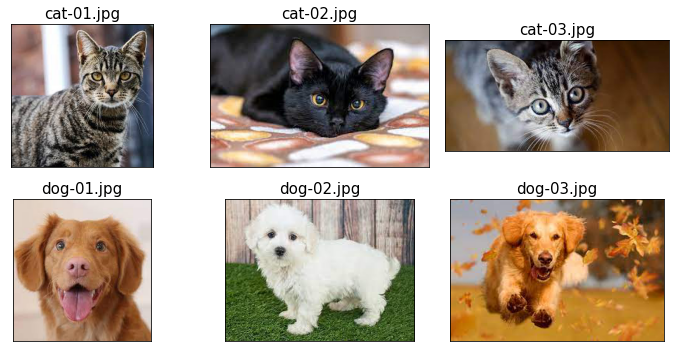

In [18]:
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
  img = Image.open(file)
  print('Image shape: ', np.array(img).shape)
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [19]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [22]:
class ImageDataset(Dataset):
  def __init__(self, file_list, labels):
    self.file_list = file_list
    self.labels = labels
  
  def __getitem__(self, index):
    file = self.file_list[index]
    label = self.labels[index]
    return file, label

  def __len__(self):
    return len(self.labels)
  

In [23]:
image_dataset = ImageDataset(file_list, labels)
for file_path, label in image_dataset:
  print(file_path, label)

/content/cats-dogs/cat-01.jpg 0
/content/cats-dogs/cat-02.jpg 0
/content/cats-dogs/cat-03.jpg 0
/content/cats-dogs/dog-01.jpg 1
/content/cats-dogs/dog-02.jpg 1
/content/cats-dogs/dog-03.jpg 1


In [24]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_width))])

In [25]:
class ImageDataset(Dataset):
  def __init__(self, file_list, labels, transform=None):
    self.file_list = file_list
    self.labels = labels
    self.transform = transform
  
  def __getitem__(self, index):
    
    file = self.file_list[index]
    img = Image.open(file)
    if self.transform is not None:
      img = self.transform(img)
    label = self.labels[index]
    return img, label

  def __len__(self):
    return len(self.labels)
  

In [26]:
image_dataset = ImageDataset(file_list, labels, transform)

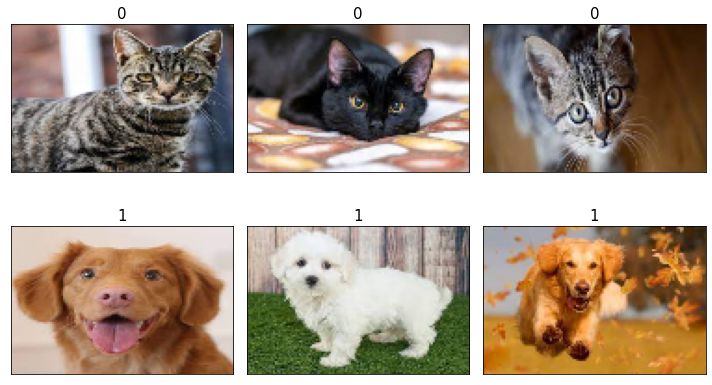

In [28]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(example[0].numpy().transpose((1, 2, 0)))
  ax.set_title(f'{example[1]}', size=15)
  
plt.tight_layout()
plt.show()